In [1]:
import pandas as pd
import numpy as np

Data/
|
---raw/ (ficheros originales)
|
---clean/ (ficheros limpios y procesador)

In [2]:
bank_f = pd.read_csv('../Data/raw/bank-full.csv', sep = ';')
bank_f

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


As we can see all the columns are already in lower case and there are no whitespaces to place any underscore.

In [3]:
bank_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
bank_f.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

There are no NaN values either and the types seem to be correctly set. Now, let's treat in a different way numerical and categorical columns, to this purpose we will split our dataframe in this type of columns

In [5]:
#%%writefile functions.py
def num_cat_splitter(df):
    df1 = df.copy()
    numerical_df = df1.select_dtypes(np.number)
    categorical_df = df1.select_dtypes(object)
    return numerical_df, categorical_df

In [6]:
numerical_df, categorical_df = num_cat_splitter(bank_f)
display(numerical_df.head())
display(categorical_df.head())

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


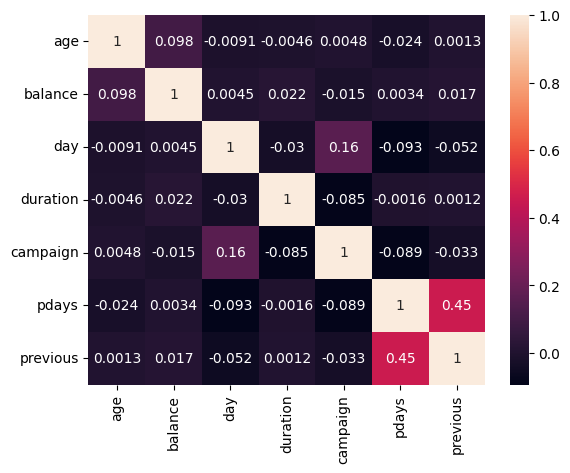

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr_matrix = numerical_df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

As we can see there is no high correlation between columns, it's not necessary to drop any in order to avoid multicollinearity.

In [8]:
#%%writefile -a functions.py
def numericals_classifier(df):
    df1 = df.copy()
    continuous = []
    discrete = []
    for col in df1.columns:
        if df1[col].nunique() > 36:
             continuous.append(df1[col])
        else:
            discrete.append(df1[col])
    continuous_df = pd.DataFrame(continuous).T
    discrete_df = pd.DataFrame(discrete).T 
    return continuous_df, discrete_df

In [9]:
continuous_df, discrete_df = numericals_classifier(numerical_df)
display(continuous_df.head())
display(discrete_df.head())

,age,balance,duration,campaign,pdays,previous
0,58,2143,261,1,-1,0
1,44,29,151,1,-1,0
2,33,2,76,1,-1,0
3,47,1506,92,1,-1,0
4,33,1,198,1,-1,0


,day
0,5
1,5
2,5
3,5
4,5


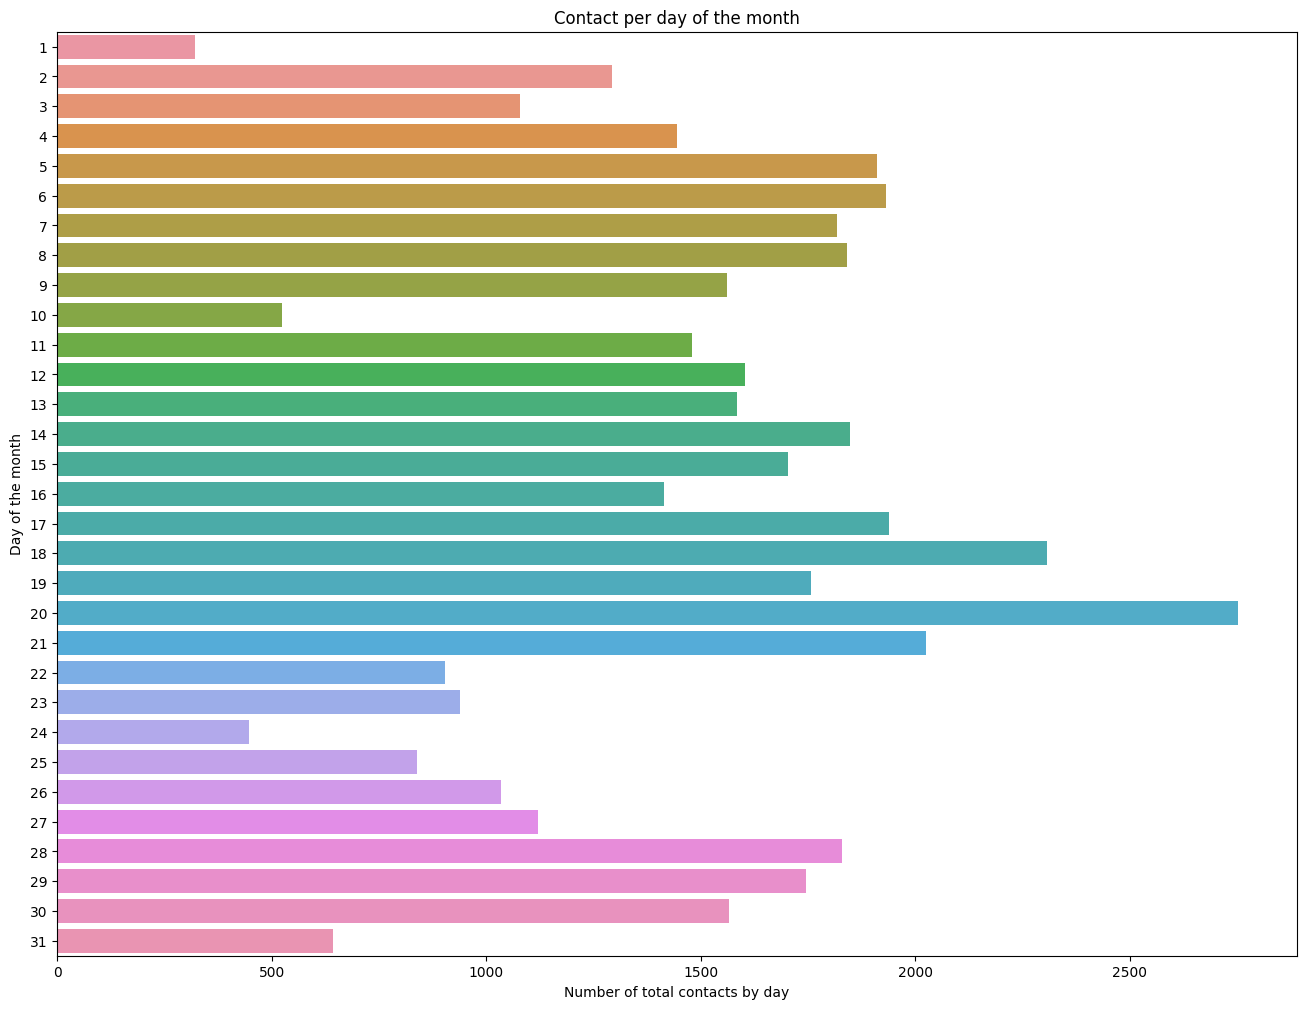

In [10]:
fig = plt.subplots(figsize=(16,12))
sns.countplot(data = discrete_df, y = 'day')
plt.title('Contact per day of the month')
plt.ylabel('Day of the month')
plt.xlabel('Number of total contacts by day')
plt.show()

In [11]:
#%%writefile -a functions.py
def hist_generator (df):
    plt_size = len(df.columns)
    fig, ax = plt.subplots(plt_size, figsize=(12,20))
    n = 0
    for col in df.columns:
        sns.histplot(data = df, x = col, ax = ax[n])
        n +=1
    plt.tight_layout()      
    plt.show()

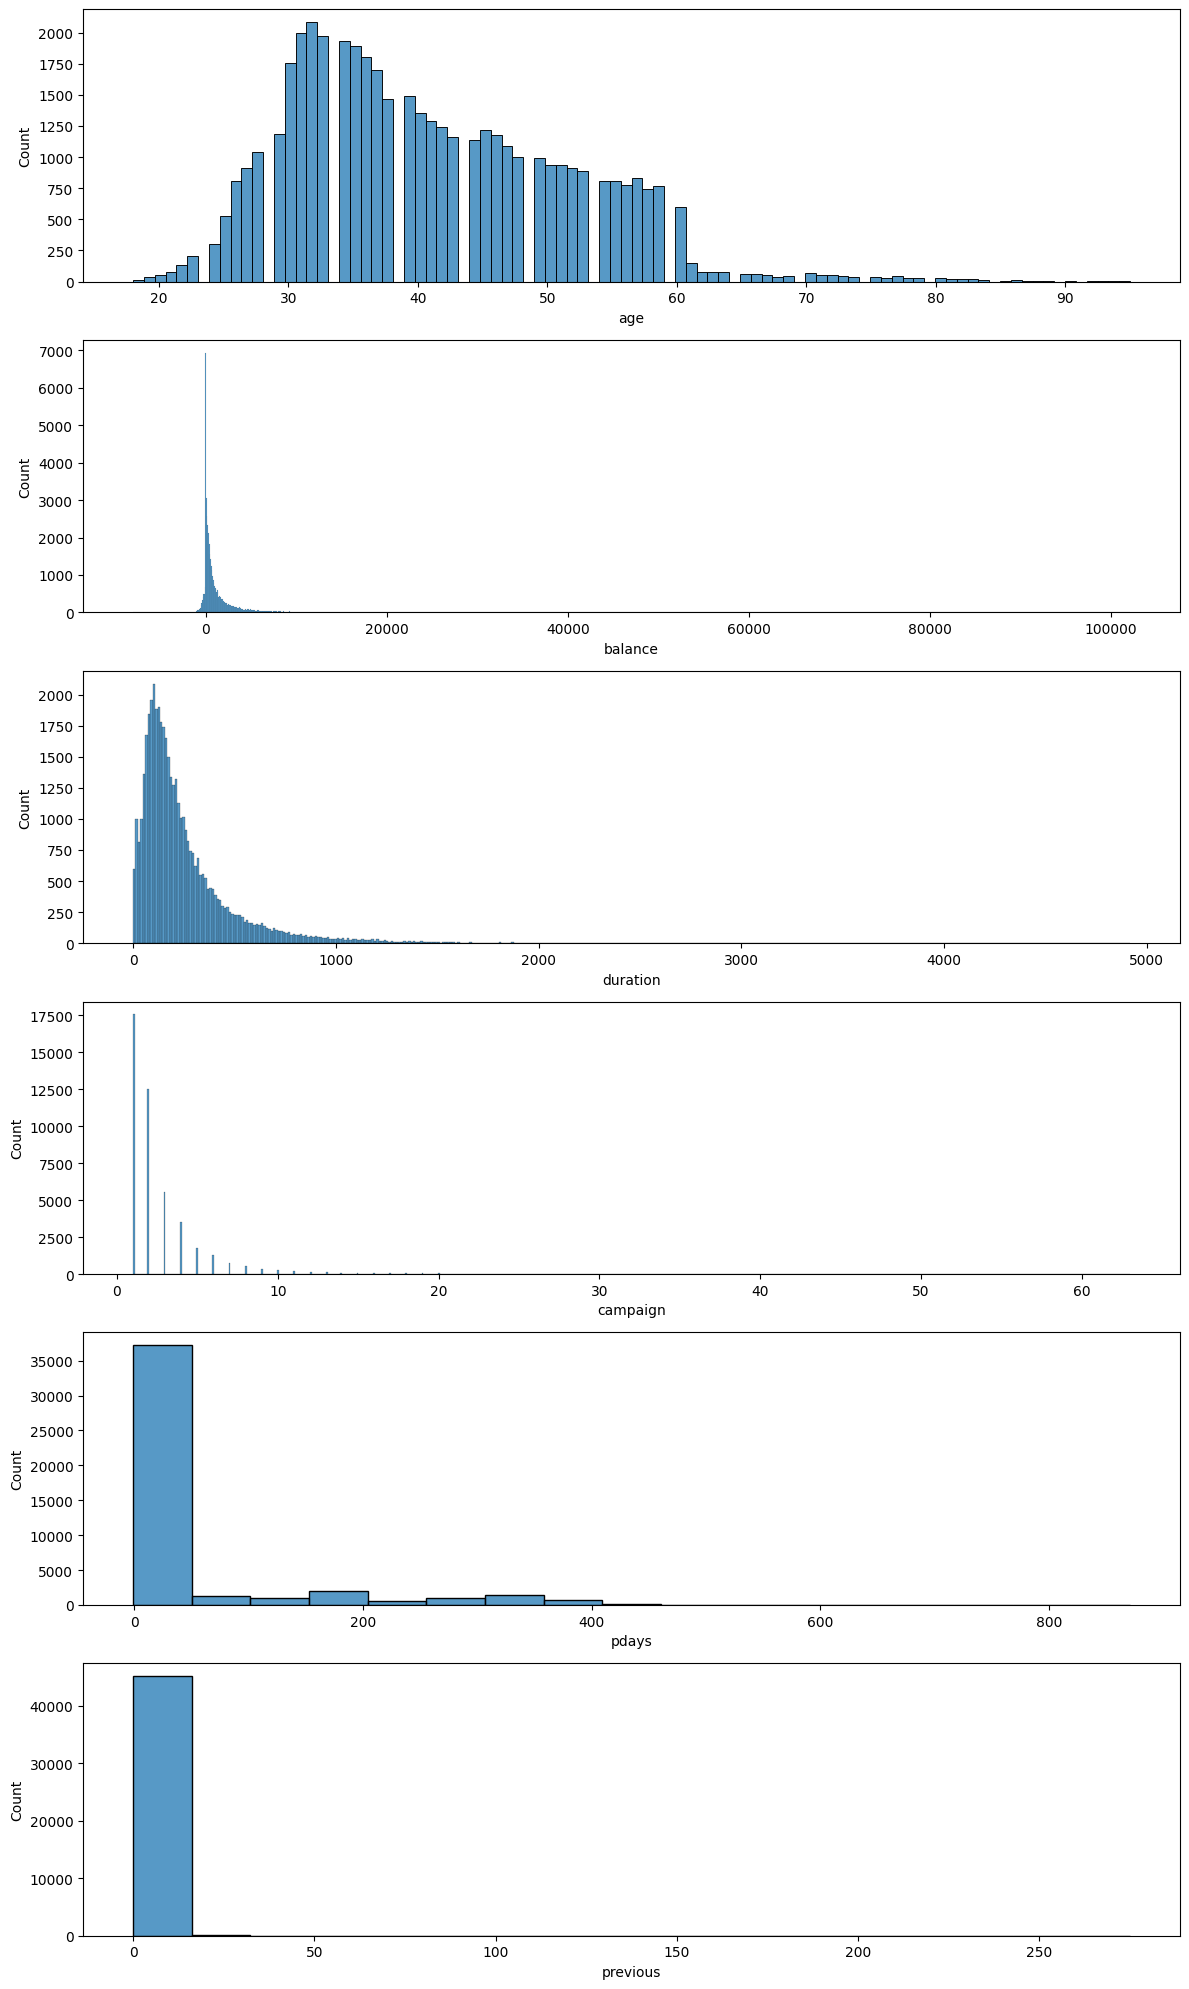

In [12]:
hist_generator(continuous_df)

In [13]:
#CONCLUSIONS REGARDING DISTRIBUTION PLOTS?

In [14]:
continuous_df.describe()

,age,balance,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000


After checking distribution plots, as well as minimum and maximum values it seems there are a lot of outliers, let's display this info better.

In [15]:
#%%writefile -a functions.py
def box_generator (df): #(df, save="Yes"):
    plt_size = len(df.columns)
    fig, ax = plt.subplots(plt_size, figsize=(16,16))
    n = 0
    for col in df.columns:
        sns.boxplot(data = df, x = col, ax = ax[n])
        n +=1
    plt.tight_layout()      
    plt.show()
    
    #if save =="Yes":
    #    plt.savefig("", format=)

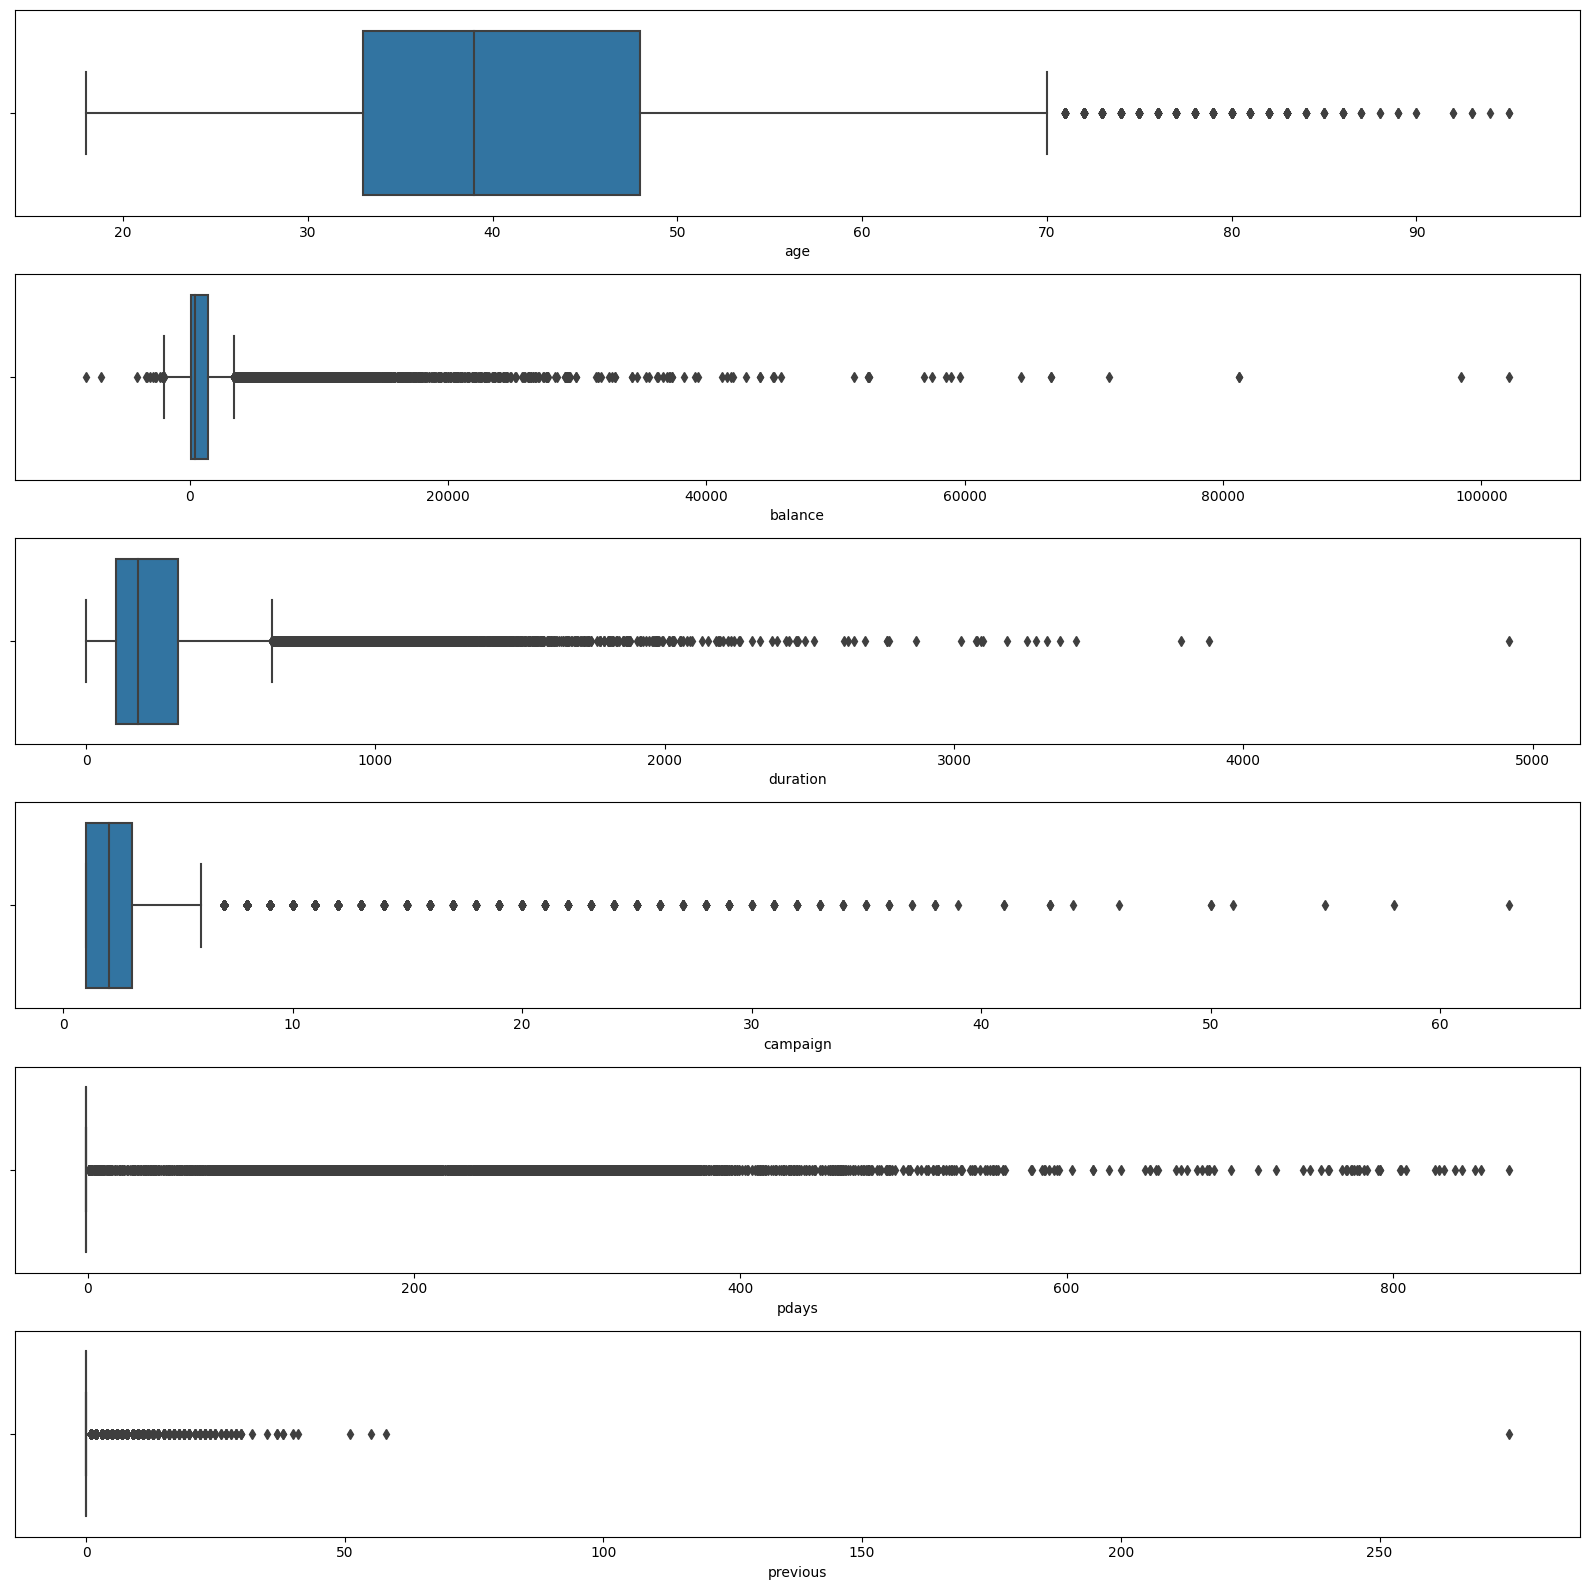

In [16]:
box_generator(continuous_df)

We were right, therefore if we want to get good predictions we will need to deal with them.

In [17]:
#DO WE NEED TO APPLY IT IN A NEW TRANSFORM NOTEBOOK? -> Yes
#here we will need to drop some and display again the distribution plot

**Now, let's go with categorical columns.**

In [18]:
#%%writefile -a functions.py
def countplot_generator(df):
    plt_size = len(df.columns)
    fig, ax = plt.subplots(plt_size, figsize=(8,50))
    n = 0
    for col in df.columns:
        if (len(df[col].value_counts().index)) >= 6:
            sns.countplot(data = df, y = col, order = df[col].value_counts().index, ax = ax[n])
        else:
            sns.countplot(data = df, x = col, order = df[col].value_counts().index, ax = ax[n])
        n +=1
    plt.tight_layout()      
    plt.show()

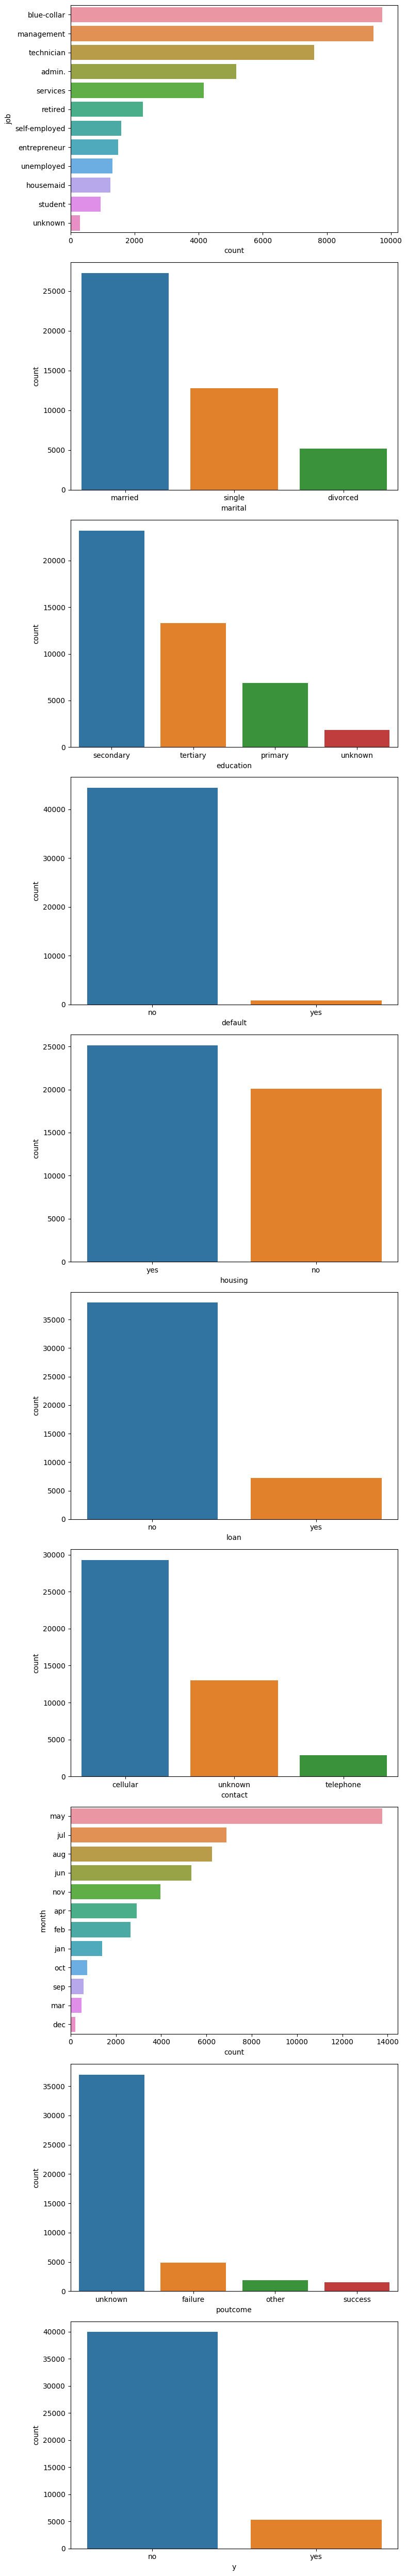

In [19]:
countplot_generator(categorical_df)

In [20]:
#%%writefile -a functions.py
def percentage_generator(df):
    for col in df.columns:
        print('These are the percentages for the column:', col)
        print((df[col].value_counts(normalize=True)*100).round(2))
        print()

In [21]:
#data cleaing for class imbalance: for ['job'] -> inactive(student, retired), other(unknown, housemaid),
#self-employed(entrepreneur, self-employed), white-collar, blue-collar?

In [22]:
categorical_df.groupby(['job', 'y']).value_counts(normalize=True)

job      y    marital   education  default  housing  loan  contact    month  poutcome
admin.   no   married   secondary  no       yes      no    unknown    may    unknown     0.057709
              single    secondary  no       yes      no    unknown    may    unknown     0.042952
              married   secondary  no       yes      no    cellular   jul    unknown     0.032159
                                            no       no    cellular   aug    unknown     0.025330
              divorced  secondary  no       yes      no    unknown    may    unknown     0.024229
                                                                                           ...   
unknown  yes  married   primary    no       no       no    cellular   oct    unknown     0.029412
                        unknown    no       no       no    telephone  may    unknown     0.029412
              single    unknown    no       no       no    cellular   jan    success     0.029412
                                

In [23]:
#sns.barplot(data=categorical_df, y='job', x='y', estimator=lambda x: sum(x==0)*100.0/len(x))
#plt.show()

In [24]:
#sns.barplot(x='group', y='Values', data=df, estimator=lambda x: sum(x==0)*100.0/len(x))

In [25]:
percentage_generator(categorical_df)

These are the percentages for the column: job
blue-collar      21.53
management       20.92
technician       16.80
admin.           11.44
services          9.19
retired           5.01
self-employed     3.49
entrepreneur      3.29
unemployed        2.88
housemaid         2.74
student           2.07
unknown           0.64
Name: job, dtype: float64

These are the percentages for the column: marital
married     60.19
single      28.29
divorced    11.52
Name: marital, dtype: float64

These are the percentages for the column: education
secondary    51.32
tertiary     29.42
primary      15.15
unknown       4.11
Name: education, dtype: float64

These are the percentages for the column: default
no     98.2
yes     1.8
Name: default, dtype: float64

These are the percentages for the column: housing
yes    55.58
no     44.42
Name: housing, dtype: float64

These are the percentages for the column: loan
no     83.98
yes    16.02
Name: loan, dtype: float64

These are the percentages for the column: 

**After plotting and checking the percentages of each categorical column, we can conclude the following in relation to the clients contacted:**
* The occupation of the clients is mostly (around 70% of the total): blue-collar, managerial, technical or administrative, in this order.
* The majority were married when contacted.
* About 50% of them had a secondary education, while 30% had a tertiary education.
* By far the majority of the clients did not have unpaid loans (just 1.8% are not paid).
* About 55% already had a housing loan.
* Only 16.02% had another type of loan.
* Most of the contacts were by telephone; however, in 28.80% of the cases the means of contact was unknown.
* May is the day with the most contacts and December the least.
* With respect to previous marketing campaigns, only 3.34% had already contracted the product promoted in previous campaigns and most of them did not know the result of the campaigns.
* Finally, for this campaign, only 11.7% of customers took out the deposit offered.

Now, let's try to filter the data by those customers that accepted the offer.

In [26]:
bank_yes = bank_f[bank_f['y'] == 'yes']

In [27]:
numerical_yes, categorical_yes = num_cat_splitter(bank_yes)

In [28]:
percentage_generator(categorical_yes)

These are the percentages for the column: job
management       24.60
technician       15.88
blue-collar      13.39
admin.           11.93
retired           9.76
services          6.98
student           5.09
unemployed        3.82
self-employed     3.54
entrepreneur      2.33
housemaid         2.06
unknown           0.64
Name: job, dtype: float64

These are the percentages for the column: marital
married     52.09
single      36.15
divorced    11.76
Name: marital, dtype: float64

These are the percentages for the column: education
secondary    46.32
tertiary     37.74
primary      11.17
unknown       4.76
Name: education, dtype: float64

These are the percentages for the column: default
no     99.02
yes     0.98
Name: default, dtype: float64

These are the percentages for the column: housing
no     63.41
yes    36.59
Name: housing, dtype: float64

These are the percentages for the column: loan
no     90.85
yes     9.15
Name: loan, dtype: float64

These are the percentages for the column

**Which differences can we see after applying the filter?:**
* The order by occupation of the clients has changed: managerial has incresed and now is the first, technical and blue-collar has decreased(specially in the last case),while administrative has remain more or less like before filtering.
* The percentage of married people has decreased while single's have increased.
* For terciary education has increased and both for primary and secondary has increase
* The % of clients did not have unpaid loans is even lower.
* Regarding clients who have a housing loan it's even bigger after applying the filter.
* The percentage is even lower for those who have another type of loan.
* Most of the successful contacts were still by telephone increasing heavily while unknown decrease in the same way.
* May is still the month with the most successful contacts, but now the second is August instead of July.
* With respect to previous marketing campaigns, those clients which already contracted a product seems to be more likely to want this new product.

Now it's time to make some groups and aggregations in order to know the kind of customer that is more likely to contract the product

In [33]:
bank_f.shape

(45211, 17)

In [34]:
bank_yes.shape

(5289, 17)

In [ ]:
def percentage_calculator(df[col]):
    per = []
    for x in df[col].index:
        c = (x/45211)*100
        per.append(c)
    percent = pd.Series(per)    
    return df[percentage]    

In [51]:
ideal_customers1 = bank_f.groupby(['job']).agg({'balance':'median', 'y':'count'})
ideal_customers1['percentage'] = (ideal_customers1['y']/bank_f['y'].count())*100
ideal_customers1.sort_values(by='percentage',ascending=False).reset_index()

,job,balance,y,percentage
0,blue-collar,388.0,9732,21.525735
1,management,572.0,9458,20.919688
2,technician,421.0,7597,16.803433
3,admin.,396.0,5171,11.437482
4,services,339.5,4154,9.188029
5,retired,787.0,2264,5.007631
6,self-employed,526.0,1579,3.492513
7,entrepreneur,352.0,1487,3.289023
8,unemployed,529.0,1303,2.882042
9,housemaid,406.0,1240,2.742695


In [50]:
ideal_customers2 = bank_yes.groupby(['job']).agg({'balance':'median', 'y':'count'})
ideal_customers2['percentage'] = (ideal_customers2['y']/bank_yes['y'].count())*100
ideal_customers2.sort_values(by='percentage',ascending=False).reset_index()

,job,balance,y,percentage
0,management,925.0,1301,24.598223
1,technician,712.5,840,15.882019
2,blue-collar,566.5,708,13.386273
3,admin.,602.0,631,11.930422
4,retired,1401.0,516,9.756098
5,services,473.0,369,6.976744
6,student,502.0,269,5.086028
7,unemployed,815.5,202,3.819247
8,self-employed,814.0,187,3.535640
9,entrepreneur,606.0,123,2.325581


In [54]:
sns.barplot(data=ideal_customers2, x='job', y='percentage')
plt.show()

ValueError: Could not interpret input 'job'

In [42]:
bank_f['y'].count()

45211

I have chosen to work with median instead of mean, taking into account the amount of outliers

In [ ]:
bank_f.groupby(['marital']).agg({'balance':'median', 'y':'count'}).sort_values(by='balance',ascending=False)

In [ ]:
bank_yes.groupby(['marital']).agg({'balance':'median', 'y':'count'}).sort_values(by='balance',ascending=False)

In [ ]:
bank_f.groupby(['education']).agg({'balance':'median', 'y':'count'}).sort_values(by='balance',ascending=False)

In [ ]:
bank_yes.groupby(['education']).agg({'balance':'median', 'y':'count'}).sort_values(by='balance',ascending=False)

In [ ]:
bank_f.groupby(['housing']).agg({'balance':'median', 'y':'count'}).sort_values(by='balance',ascending=False)

In [ ]:
bank_yes.groupby(['housing']).agg({'balance':'median', 'y':'count'}).sort_values(by='balance',ascending=False)

Which is the behaviour of the best and the worst customers(according their average balance in their account during the yerar) when they were asked in contract the product promoted in this marketing campaing?

In [ ]:
display(bank_yes.nlargest(5,['balance']))
display(bank_yes.nsmallest(5,['balance']))

In [ ]:
display(bank_f.nlargest(5,['balance']))
display(bank_f.nsmallest(5,['balance']))

Now, let's perform an analysis by age

In [ ]:
bank_f.columns

In [ ]:
age_labels = ['<25', '26-34', '35-44', '45-54', '55-64','<65']
bank_f['age_category'] = pd.cut(bank_f['age'],[0,25,35,45,55,65,100],labels=age_labels)
bank_yes['age_category'] = pd.cut(bank_yes['age'],[0,25,35,45,55,65,100],labels=age_labels)

In [ ]:
bank_yes.head()

In [ ]:
bank_yes.groupby(['age_category','education']).agg({'balance':'median', 'y':'count'}).sort_values(by='balance',ascending=False)

In [ ]:
categorical_yes.pivot_table(index=['age_category'], columns=['education'])

In [ ]:
categorical_yes['age_category'] = pd.cut(bank_yes['age'],[0,25,35,45,55,65,100],labels=age_labels)

In [ ]:
categorical_yes.head()

In [ ]:
#percentages??

In [ ]:
#export the resultant Jupyter notebook